In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
!pip install -q keras


In [ ]:
import keras

Please download the dataset from the below url

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/Datasets/dataset-cottondisease/train'
valid_path = '/content/drive/MyDrive/Datasets/dataset-cottondisease/val'


In [ ]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




In [ ]:
# don't train existing weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/Datasets/dataset-cottondisease/train/*')
folders

['/content/drive/MyDrive/Datasets/dataset-cottondisease/train/fresh cotton leaf',
 '/content/drive/MyDrive/Datasets/dataset-cottondisease/train/diseased cotton leaf',
 '/content/drive/MyDrive/Datasets/dataset-cottondisease/train/fresh cotton plant',
 '/content/drive/MyDrive/Datasets/dataset-cottondisease/train/diseased cotton plant']

In [ ]:
len(folders)

4

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset-cottondisease/train',
                                                 target_size = (224, 224),
                                                 batch_size = 64,
                                                 class_mode = 'categorical')

Found 1951 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/Datasets/dataset-cottondisease/val',
                                            target_size = (224, 224),
                                            batch_size = 64,
                                            class_mode = 'categorical')

Found 324 images belonging to 4 classes.


In [ ]:
!pip install --upgrade pip

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.2.4)


In [ ]:
!pip install --upgrade Pillow

Requirement already up-to-date: Pillow in /usr/local/lib/python3.6/dist-packages (8.0.1)


In [ ]:
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch = len(training_set),
  validation_steps = len(test_set)
)

Epoch 1/20
31/31 [==============================] - 495s 16s/step - loss: 0.9673 - accuracy: 0.8611 - val_loss: 0.6544 - val_accuracy: 0.8735
Epoch 2/20
31/31 [==============================] - 32s 1s/step - loss: 0.5525 - accuracy: 0.9077 - val_loss: 0.3384 - val_accuracy: 0.9074
Epoch 3/20
31/31 [==============================] - 32s 1s/step - loss: 0.3048 - accuracy: 0.9329 - val_loss: 0.3754 - val_accuracy: 0.9074
Epoch 4/20
31/31 [==============================] - 32s 1s/step - loss: 0.2596 - accuracy: 0.9313 - val_loss: 0.2955 - val_accuracy: 0.9043
Epoch 5/20
31/31 [==============================] - 32s 1s/step - loss: 0.2606 - accuracy: 0.9436 - val_loss: 0.3015 - val_accuracy: 0.9259
Epoch 6/20
31/31 [==============================] - 32s 1s/step - loss: 0.1941 - accuracy: 0.9462 - val_loss: 0.2177 - val_accuracy: 0.9414
Epoch 7/20
31/31 [==============================] - 32s 1s/step - loss: 0.1650 - accuracy: 0.9580 - val_loss: 0.2042 - val_accuracy: 0.9414
Epoch 8/20
31/31 [

In [ ]:
import matplotlib.pyplot as plt

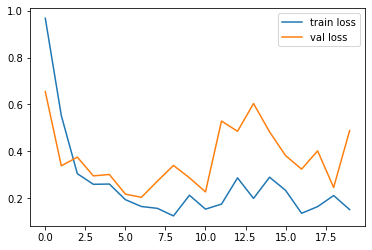

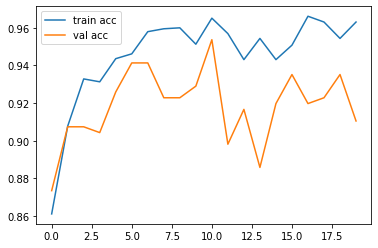

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file


from tensorflow.keras.models import load_model

model.save('model_inception.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[1.2430636e-03, 9.9875689e-01, 1.5872120e-14, 1.3027079e-13],
       [1.0000000e+00, 3.4284796e-22, 3.5602316e-10, 2.2658741e-19],
       [1.0000000e+00, 1.1791282e-31, 1.0196276e-27, 5.0113177e-36],
       ...,
       [2.5681910e-08, 9.7692728e-01, 4.1141664e-04, 2.2661304e-02],
       [9.9996710e-01, 2.5114694e-10, 3.1704913e-05, 1.1860244e-06],
       [2.2134584e-14, 1.0000000e+00, 2.0281051e-11, 1.7128626e-15]],
      dtype=float32)

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([1, 0, 0, 1, 2, 1, 1, 1, 1, 2, 0, 3, 3, 1, 1, 1, 2, 0, 2, 0, 2, 0,
       3, 3, 2, 3, 2, 2, 2, 3, 0, 2, 3, 0, 1, 1, 2, 0, 2, 3, 2, 1, 3, 3,
       3, 1, 0, 3, 2, 2, 0, 2, 2, 2, 1, 0, 3, 1, 2, 2, 2, 3, 0, 3, 3, 0,
       2, 1, 1, 1, 3, 1, 0, 1, 1, 2, 2, 0, 1, 1, 3, 0, 1, 3, 1, 2, 2, 2,
       2, 0, 0, 2, 3, 0, 1, 0, 3, 3, 1, 0, 3, 1, 3, 2, 2, 0, 3, 1, 2, 1,
       3, 1, 2, 3, 0, 1, 2, 3, 0, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 2, 3, 1,
       2, 3, 0, 2, 3, 2, 1, 0, 0, 2, 2, 3, 3, 1, 2, 1, 3, 0, 3, 1, 3, 2,
       3, 1, 2, 3, 1, 3, 2, 2, 3, 2, 1, 1, 2, 3, 3, 1, 1, 2, 0, 0, 1, 2,
       0, 3, 1, 1, 1, 1, 3, 1, 3, 3, 3, 0, 1, 3, 3, 1, 1, 3, 2, 0, 3, 1,
       2, 3, 1, 1, 1, 1, 1, 2, 0, 2, 0, 0, 3, 0, 2, 3, 3, 1, 2, 3, 0, 2,
       1, 1, 0, 2, 3, 1, 0, 0, 2, 2, 0, 1, 0, 2, 1, 2, 0, 0, 0, 3, 0, 0,
       2, 1, 3, 2, 1, 3, 2, 3, 1, 1, 2, 1, 1, 0, 0, 1, 3, 2, 3, 2, 2, 3,
       1, 1, 1, 2, 3, 2, 1, 1, 1, 3, 0, 3, 2, 3, 0, 0, 3, 2, 2, 3, 2, 1,
       1, 0, 2, 2, 2, 1, 2, 1, 1, 2, 1, 1, 0, 3, 0,

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_inception.h5')